In [1]:
#https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial
#https://www-m9.ma.tum.de/graph-algorithms/directed-chinese-postman/index_en.html

import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [239]:
def plot_graph(g,title,**kwargs):
    if kwargs:
        path_list=kwargs.get('path_list')
        path_cost=kwargs.get('path_cost')
        source=kwargs.get('source')
        dest=kwargs.get('destination')
        path_list_minus_ends = path_list
        path_list_minus_ends.remove(source)
        path_list_minus_ends.remove(dest)
    else:
        path_list=[]
        path_list_minus_ends=[]
        path_cost=-1
        source=""
        dest=""
    color_map = [] 
    for node in g:
        if node in path_list_minus_ends:
            color_map.append('yellow')
        elif node == source:
            color_map.append('blue')
        elif node == dest:
            color_map.append('green')
        else:
            color_map.append('grey')
    plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
    pos=nx.get_node_attributes(g,'pos')
    node_labels=nx.get_node_attributes(g,'id')
    nx.draw(g,pos,node_color=color_map,node_size=500)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_labels(g,pos,labels=node_labels)
    updated_labels={}
    for item in labels:
        updated_labels[item[:2]]=labels[item]
    nx.draw_networkx_edge_labels(g,pos,edge_labels=updated_labels,connectionstyle='arc3,rad=-100',rotate=True)
    if path_cost > 0:
        plt.text(12,13,"Path cost: "+str(path_cost))
    plt.title(title)
    plt.show()

def plot_graph2(g,title):
    #pos=nx.get_node_attributes(g,'pos')
    layout = dict((n, g.nodes[n]["pos"]) for n in g.nodes())
    nx.draw(g,pos=layout,with_labels=True,node_size=500)
    '''
    ax = plt.gca()
    for edge in g.edges():
            ax.annotate("",
                xy=layout[edge[0]], xycoords='data',
                xytext=layout[edge[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=-0.3",
                                ),
                )

    '''
    plt.show()

def add_edges(g,edges,weight,name):
    if name in list(nx.get_edge_attributes(g,'name').values()):
        edge_weight_data=nx.get_edge_attributes(g,'weight')
        this_edge_weight_list=edge_weight_data[edges]
        this_edge_weight_list.append(weight)
        g.add_edge(edges[0],edges[1],name=name,weight=this_edge_weight_list)
    else:
        g.add_edge(edges[0],edges[1],name=name,weight=[weight])




In [3]:
'''
import csv
edgelist = pd.read_csv('C:\\Users\\SIDDHARTHA\\Trinity\\AI\\AIDemo\\data\\romania_cities.csv')
nodelist = pd.read_csv('C:\\Users\\SIDDHARTHA\\Trinity\\AI\\AIDemo\\data\\romanian_edges.csv')

cities_list=[]
for index,row in nodelist.iterrows():
    cities_list.append(row['id'])

with open('data\\germany_edge_list.csv', mode='w', newline='') as edge_list_file:
    writer=csv.writer(edge_list_file,delimiter=',')
    writer.writerow(['node1','node2','trail','distance','color','estimate'])
    for index,row in edgelist.iterrows():
        for city in cities_list:
            if not str(row['cities']) == str(city):
                writer.writerow([str(row['cities']),str(city),str(row['cities']+'-'+str(city)),str(row[city]),'red','0'])
'''


"\ncities_list=[]\nfor index,row in nodelist.iterrows():\n    cities_list.append(row['id'])\n\nwith open('data\\germany_edge_list.csv', mode='w', newline='') as edge_list_file:\n    writer=csv.writer(edge_list_file,delimiter=',')\n    writer.writerow(['node1','node2','trail','distance','color','estimate'])\n    for index,row in edgelist.iterrows():\n        for city in cities_list:\n            if not str(row['cities']) == str(city):\n                writer.writerow([str(row['cities']),str(city),str(row['cities']+'-'+str(city)),str(row[city]),'red','0'])\n"

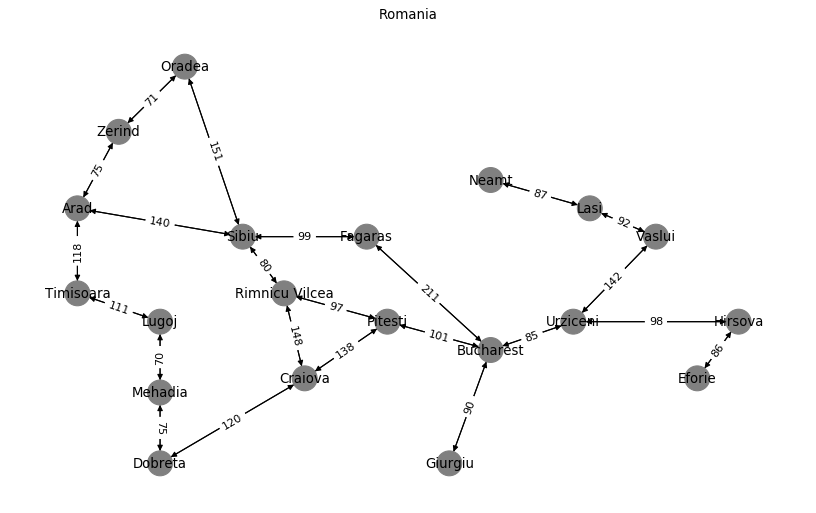

In [240]:
edgelist = pd.read_csv('C:\\Users\\SIDDHARTHA\\Trinity\\AI\\AIDemo\\data\\romanian_edges.csv')
nodelist = pd.read_csv('C:\\Users\\SIDDHARTHA\\Trinity\\AI\\AIDemo\\data\\romania_cities.csv')

#edgelist=pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
#nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

g = nx.DiGraph()

for index,row in nodelist.iterrows():
    g.add_node(row['id'],pos=(row['X'],row['Y']),id=row['id'])


for index,row in edgelist.iterrows():
    #add_edges(g,(row['node1'],row['node2']),row['distance'],row['trail'])
    g.add_edge(row['node1'],row['node2'],name=str(row['trail'])+str(row['distance']),weight=row['distance']) 

plot_graph(g,'Romania')

In [77]:
#print(g.edges(data=True))
#add_edges(g,('b','a'),890,'ba')
#print(g.edges(data=True))
#plot_graph(g,'CPP')

In [72]:
'''
import networkx as nx
import matplotlib.pyplot as plt



# Graph data

names = g.nodes()
positions = list(nx.get_node_attributes(g,'pos').values())
edges = g.edges()
labels = list(nx.get_edge_attributes(g,'weight').values())

print(g.edges(data=True))

# Matplotlib figure
plt.figure('My graph problem')

# Create graph
G = nx.MultiDiGraph(format='png', directed=True)

for index, name in enumerate(names):
    G.add_node(name, pos=positions[index])

labels = {}
layout = dict((n, G.nodes[n]["pos"]) for n in G.nodes())
nx.draw(G, pos=layout, with_labels=True, node_size=600)

ax = plt.gca()
for edge in edges:
    ax.annotate("",xy=layout[edge[0]], xycoords='data',xytext=layout[edge[1]], textcoords='data',
    arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.3"))
    ax.annotate("x",xy=(layout[edge[0]][0]-1,layout[edge[0]][1]-1))

plt.show()
'''

#print(g.edges(data=True))   

'\nimport networkx as nx\nimport matplotlib.pyplot as plt\n\n\n\n# Graph data\n\nnames = g.nodes()\npositions = list(nx.get_node_attributes(g,\'pos\').values())\nedges = g.edges()\nlabels = list(nx.get_edge_attributes(g,\'weight\').values())\n\nprint(g.edges(data=True))\n\n# Matplotlib figure\nplt.figure(\'My graph problem\')\n\n# Create graph\nG = nx.MultiDiGraph(format=\'png\', directed=True)\n\nfor index, name in enumerate(names):\n    G.add_node(name, pos=positions[index])\n\nlabels = {}\nlayout = dict((n, G.nodes[n]["pos"]) for n in G.nodes())\nnx.draw(G, pos=layout, with_labels=True, node_size=600)\n\nax = plt.gca()\nfor edge in edges:\n    ax.annotate("",xy=layout[edge[0]], xycoords=\'data\',xytext=layout[edge[1]], textcoords=\'data\',\n    arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.3"))\n    ax.annotate("x",xy=(layout[edge[0]][0]-1,layout[edge[0]][1]-1))\n\nplt.show()\n'

In [216]:
#CPP algo start.
from collections import deque
def BFS(g,start,end):
    queue = deque()
    visited = deque()
    current_node = start
    visited.append(start)
    if start not in g.nodes() or end not in g.nodes():
        return "Nodes not present in graph!"
    else:
        while True:
            adj=[edge for edge in g.edges(data=True) if edge[0]==current_node and edge[1] not in visited]
            #print('current node: ',current_node)
            #print('adj: ',adj)
            for edge in adj:
                queue.append(edge[1])
                visited.append(edge[1])
                if end in visited:
                    return visited
            #print('q-',queue)
            #print('v-',visited)
            #print('visited: ',visited)
            #print('q: ',queue)
            #print('------------------------------------------')
            #if all(item in visited for item in g.nodes()):
            #    return visited
            current_node=queue.popleft()
                

print(BFS(g,'a','e'))



Nodes not present in graph!


In [217]:
def djkstra(g,start):
    if start not in g.nodes():
        return str(start)+" is not a valid node"
    LARGE_NUM=999999
    shortest_path_dict={}
    visited=[]
    unvisited=[]
    current_node=start
    step=0
    for node in g.nodes():
        if node != start:
            shortest_path_dict[node]={'weight':LARGE_NUM,'prev':None}
        else:
            shortest_path_dict[node]={'weight':0,'prev':None}
    while True:
            adj=[edge for edge in g.edges(data=True) if edge[0]==current_node and edge[1] not in visited]
            #print(shortest_path_dict)
            dist_from_curr=shortest_path_dict[current_node]['weight']
            for edge in adj:
                adj_node=edge[1]
                weight=edge[2]['weight']
                if dist_from_curr+weight < shortest_path_dict[adj_node]['weight']:
                    shortest_path_dict[adj_node]['weight']=dist_from_curr+weight
                    shortest_path_dict[adj_node]['prev']=current_node
            shortest_path_dict={k: v for k, v in sorted(shortest_path_dict.items(), key=lambda item: item[1]['weight'])}
            visited.append(current_node)
            for item in list(shortest_path_dict.keys()):
                if item not in visited:
                    current_node=item
                    break
            #print(shortest_path_dict)
            #print(visited)
            #print(current_node)
            #print('----')
            if all(elem in visited for elem in g.nodes()):
                return shortest_path_dict

def get_shortest_path(path_data,end):
    #print(path_data)
    shortest_path = []
    if 'not a valid node' in path_data or end not in g.nodes():
        return "Invalid nodes in input!"
    current_node=end
    path=[]
    path.append(end)
    while path_data[current_node]['prev'] is not None:
        path.append(path_data[current_node]['prev'])
        current_node=path_data[current_node]['prev']
    shortest_path=path[::-1]
    shortest_path.append(path_data[end]['weight'])
    return shortest_path



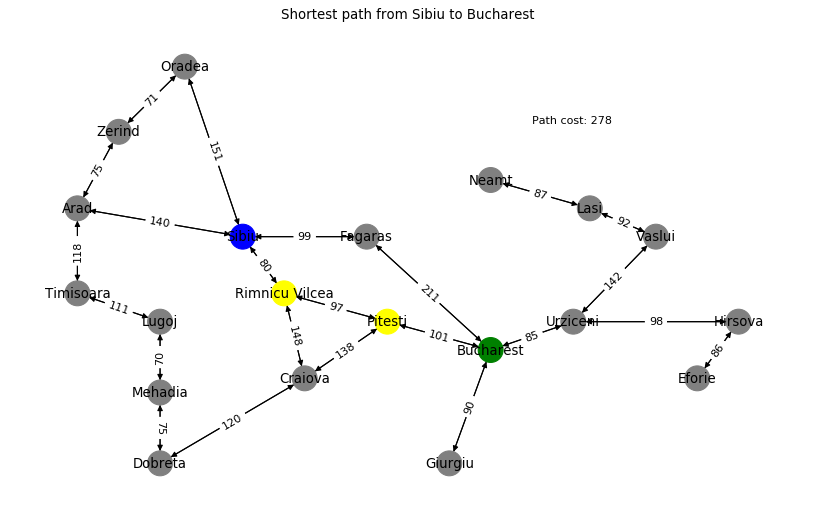

In [241]:
#djkstra(g,'Aachen')
source='Sibiu'
dest = 'Bucharest'
path_data=get_shortest_path(djkstra(g,source),dest)
path_cost=path_data[len(path_data)-1]
shortest_path=path_data[:len(path_data)-1]
plot_graph(g,'Shortest path from '+str(source) + ' to '+str(dest),path_list=shortest_path,path_cost=path_cost,source=source,destination=dest)


In [ ]:
'''
for city1 in g.nodes():
    for city2 in g.nodes():
        if not city1 == city2:
            print(city1,'-',city2,get_shortest_path(djkstra(g,city1),city2))
'''